### ENSIMAG – Grenoble INP – UGA - Academic year 2024-2025
# Introduction to Statistical Learning and Applications ([website](https://github.com/ISLA-Grenoble/2025-main))

- Pedro L. C. Rodrigues -- `pedro.rodrigues@inria.fr`

- Alexandre Wendling -- `alexandre.wendling@univ-grenoble-alpes.fr`

***

### ⚠️ General guidelines for TPs

Each team shall upload its report on [Teide](https://teide.ensimag.fr/) before the deadline indicated at the course website. Please
**include the name of all members** of the team on top of your report.
The report should contain graphical representations and explanatory text. For each graph, axis names should be provided as well
as a legend when it is appropriate. Figures should be explained by a few sentences in the text. Answer to
the questions in order and refer to the question number in your report. Computations and
graphics have to be performed in `python`. The report should be written as a jupyter notebook. This is a file format that allows users to format documents containing text written in markdown and `python` instructions. You should include all of the `python` instructions that you have used in the document so that it may be possible to replicate your results.

***

# 🖥️ TP1: Analysis of prostate cancer data

A medical study done on patients with prostate cancer aims to analyze the correlation between the prostate tumor volume and a set of clinical and morphometric variables. These variables include prostate specific antigens, a biomarker for prostate cancer, and a number of clinical measures (age, prostate weight, etc). The goal of this lab is to build a regression model to predict the severity of cancer, expressed by logarithm of the tumor volume -- `lcavol` variable -- from the following predictors:
- `lpsa`: log of a prostate specific antigen
- `lweight`: log of prostate weight
- `age`: age of the patient
- `lbph`: log of benign prostatic hyperplasia amount
- `svi`: seminal vesicle invasion
- `lcp`: log of capsular penetration
- `gleason`: Gleason score (score on a cancer prognosis test)
- `pgg45`: percent of Gleason scores 4 or 5

The file `prostate.data`, available [here](https://github.com/ISLA-Grenoble/2025-main/blob/main/TP/TP1/prostate.data), contains measures of the logarithm of the tumor
volume and of the 8 predictors for 97 patients. This file also contains an additional variable, called `train`, which will
not be used and has to be removed.

## ▶️ Exercise 1: Preliminary analysis of the data (1 points)

**(a)** Download the file `prostate.data` and store it in your current folder. Read the dataset in using `pandas` as per
```
import pandas as pd
df = pd.read_csv("prostate.data", sep="\t")
```
check how to use function `df.drop` to remove the first and last columns of `df` containing useless tags.

In [7]:
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 1.6 MB/s eta 0:00:001.5 MB/s eta 0:00:01m


In [3]:
!pip install pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 2.1 MB/s eta 0:00:00? eta -:--:--
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 2.5 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 4.0 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.9/507.9 kB 4.5 MB/s eta 0:00:00m eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.8/346.8 kB 4.3 MB/s eta 0:00:004.8 MB/s eta 0:00:01


In [6]:
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.9/101.9 kB 2.0 MB/s eta 0:00:00 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 3.6 MB/s eta 0:00:00m eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.6/323.6 kB 5.6 MB/s eta 0:00:006.2 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 4.2 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 4.6 MB/s eta 0:00:004.8 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 4.0 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 3.6 MB/s eta 0:00:00


In [62]:
!pip install scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.5 MB/s eta 0:00:00 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.2/40.2 MB 3.6 MB/s eta 0:00:00m eta 0:00:010:00:01


In [100]:
!pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 2.3 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 kB 1.5 MB/s eta 0:00:001.6 MB/s eta 0:00:01


In [339]:
!pip install sklearn

  Installing build dependencies ... one
  Getting requirements to build wheel ... error
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
    

In [341]:
pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 3.9 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 3.9 MB/s eta 0:00:000:00:010:00:01
Note: you may need to restart the kernel to use updated packages.


In [133]:
# import required package
import statsmodels.api as sm

In [342]:
import numpy as np
import itertools
import sklearn

In [82]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("prostate.data", sep="\t")
df.head()

,Unnamed: 0,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
0,1,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,T
1,2,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,T
2,3,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,T
3,4,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,T
4,5,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,T


In [83]:
df.dtypes

Unnamed: 0      int64
lcavol        float64
lweight       float64
age             int64
lbph          float64
svi             int64
lcp           float64
gleason         int64
pgg45           int64
lpsa          float64
train          object
dtype: object

In [84]:
df.columns

Index(['Unnamed: 0', 'lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp',
       'gleason', 'pgg45', 'lpsa', 'train'],
      dtype='object')

In [85]:
df=df.drop(['Unnamed: 0','train'],axis='columns')
df.head()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
0,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783
1,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519
2,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519
3,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519
4,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564


In [86]:
df.dtypes

lcavol     float64
lweight    float64
age          int64
lbph       float64
svi          int64
lcp        float64
gleason      int64
pgg45        int64
lpsa       float64
dtype: object

In [87]:
df.shape

(97, 9)

In [88]:
missing_values = df.isnull().sum()
missing_values

lcavol     0
lweight    0
age        0
lbph       0
svi        0
lcp        0
gleason    0
pgg45      0
lpsa       0
dtype: int64

In [89]:
df.describe()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,1.350010,3.628943,63.865979,0.100356,0.216495,-0.179366,6.752577,24.381443,2.478387
std,1.178625,0.428411,7.445117,1.450807,0.413995,1.398250,0.722134,28.204035,1.154329
min,-1.347074,2.374906,41.000000,-1.386294,0.000000,-1.386294,6.000000,0.000000,-0.430783
25%,0.512824,3.375880,60.000000,-1.386294,0.000000,-1.386294,6.000000,0.000000,1.731656
50%,1.446919,3.623007,65.000000,0.300105,0.000000,-0.798508,7.000000,15.000000,2.591516
75%,2.127041,3.876396,68.000000,1.558145,0.000000,1.178655,7.000000,40.000000,3.056357
max,3.821004,4.780383,79.000000,2.326302,1.000000,2.904165,9.000000,100.000000,5.582932


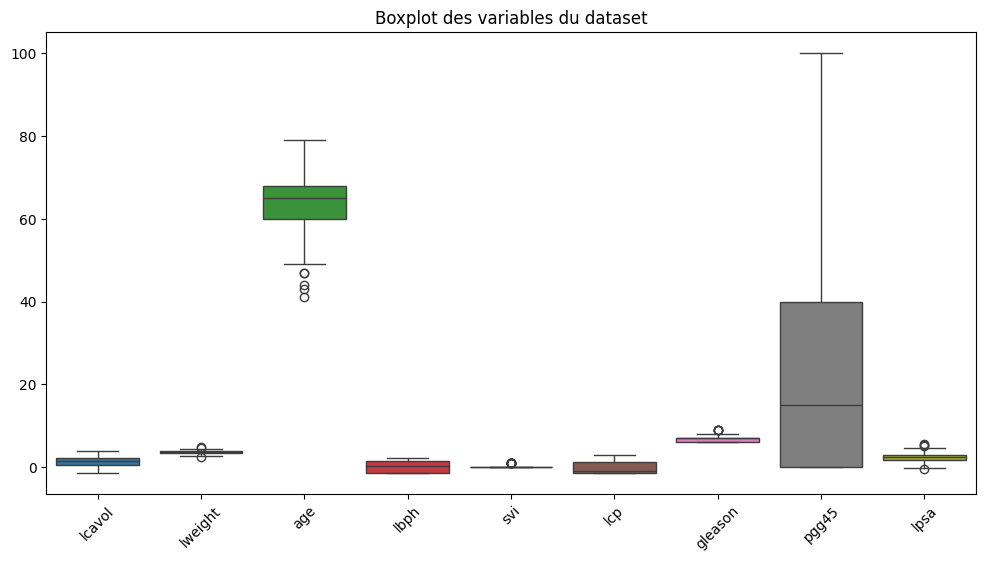

In [90]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=45)  # Rotation des labels
plt.title("Boxplot des variables du dataset")
plt.show()

**(b)** The function defined below generates scatterplots (clouds of points) between all pairs of variables, allowing us to visually analyse the correlations between all variables in the dataframe. Explain what each line of function `pairplot` does and how it affects the final plot. You can use command `help` in the `python` shell to get the documentation of each function.

``` 
# import the main plotting library for python
import matplotlib.pyplot as plt

# make a pairplot from scratch
def pairplot(df, figsize=None):
    if figsize is None:
        figsize = (7.10, 6.70)
    n_vars = df.shape[1]
    fig, ax = plt.subplots(figsize=figsize, ncols=n_vars, nrows=n_vars)
    plt.subplots_adjust(
        wspace=0.10, hspace=0.10, left=0.05, right=0.95, bottom=0.05, top=0.95)
    for i in range(n_vars):
        for j in range(n_vars):
            axij = ax[i][j]
            i_name = df.columns[i]
            j_name = df.columns[j]
            axij.set_xticks([])
            axij.set_yticks([])
            axij.margins(0.1)
            if i != j:
                axij.scatter(df[i_name], df[j_name], s=10)
            else:
                axij.text(0.5, 0.5, i_name, fontsize=10,
                              horizontalalignment='center',
                              verticalalignment='center',
                              transform = axij.transAxes)        
    return fig, ax

fig, ax = pairplot(df)
plt.show()
```

**(c)** Based on the generated figure, identify which variables seem the most correlated to `lcavol`. Also, infer the datatype for each of the predictors.

<Axes: >

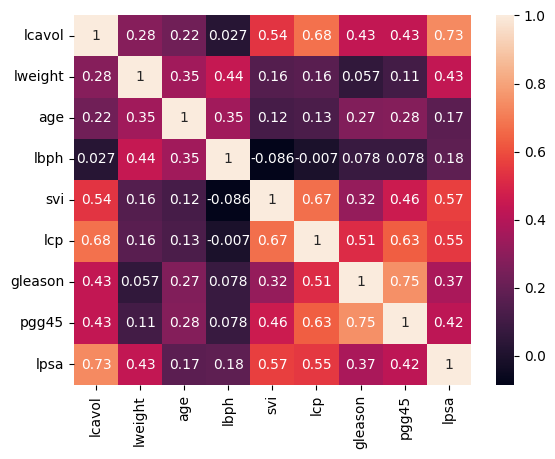

In [91]:
sns.heatmap(df.corr(), annot=True)

The variables that are the most correlated to 'lcavol' are 'lpsa','lcp' and 'svi'

**(d)** Recall the formula of correlation between two vectors and implement it with `numpy`. Explain the difference of your result when compared to `df.corr()`. Change the function `pairplot`to show the correlation coefficient on the upper triangle of the subplots. (Bonus) Use locally weighted scatterplot smoothing (LOWESS) to see the trends between pairs of features with `statsmodels.nonparametric.smoothers_lowess`.

In [92]:
df.corr()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
lcavol,1.000000,0.280521,0.225000,0.027350,0.538845,0.675310,0.432417,0.433652,0.734460
lweight,0.280521,1.000000,0.347969,0.442264,0.155385,0.164537,0.056882,0.107354,0.433319
age,0.225000,0.347969,1.000000,0.350186,0.117658,0.127668,0.268892,0.276112,0.169593
lbph,0.027350,0.442264,0.350186,1.000000,-0.085843,-0.006999,0.077820,0.078460,0.179809
svi,0.538845,0.155385,0.117658,-0.085843,1.000000,0.673111,0.320412,0.457648,0.566218
lcp,0.675310,0.164537,0.127668,-0.006999,0.673111,1.000000,0.514830,0.631528,0.548813
gleason,0.432417,0.056882,0.268892,0.077820,0.320412,0.514830,1.000000,0.751905,0.368987
pgg45,0.433652,0.107354,0.276112,0.078460,0.457648,0.631528,0.751905,1.000000,0.422316
lpsa,0.734460,0.433319,0.169593,0.179809,0.566218,0.548813,0.368987,0.422316,1.000000


In [93]:
np.corrcoef(df['lcavol'],df['lweight']) #took 'lweight' as an example as the corrcoef is only used for two vectors

array([[1.        , 0.28052138],
       [0.28052138, 1.        ]])

There is not much of a difference as the only different thing between the two functions is that one is applied on the whole dataset, so returns the correlation matrix of all variables and the other is only used for two vectors thus returns the correlation matrix of the two.

In [ ]:
#change pairplot kinda shit 

### statsmodels.nonparametric.smoothers_lowess.lowess
#looks like some fine shyt right there!

## ▶️ Exercise 2: Linear regression (7 points)

In this exercise, we will perform a multiple linear regression to build a predictive model for the `lcavol` variable. The variables `gleason` and `svi` should be considered as qualitative variables. You can declare them as such with

```
df['svi'] = df['svi'].astype("category")
df['gleason'] = df['gleason'].astype("category")
```

**(a)** Provide the mathematical equation of the regression model (note that you can use LaTeX to write equations) and define the diﬀerent parameters. 

### Équation de régression linéaire pour lcavol
$
\hat{lcavol} = \beta_0 + \beta_1 \cdot lweight + \beta_2 \cdot age + \beta_3 \cdot lbph + \beta_4 \cdot svi + \beta_5 \cdot lcp + \beta_6 \cdot gleason + \beta_7 \cdot pgg45 + \beta_8 \cdot lpsa + \epsilon
$

**(b)** Before doing the linear regression of this TP, you will first have to handle the one-hot encoding of the categorical features of the dataframe. One way of doing this is as follows:

```
# encode the categorical features with dummy variables
df_enc = pd.get_dummies(df, dtype=np.float64)
# to drop one dummy column for each predictor
df_enc = df_enc.drop(columns=['svi_0', 'gleason_6'])
# add a column of ones to the dataframe
df_enc['intercept'] = 1
# extract the dataframe for predictors
X = df_enc.drop(columns=['lcavol'])
# get the observed values to predict
y = df['lcavol']
```

- Why did we fix a `dtype` in `pd.get_dummies`?
- Why did we drop two columns after the encoding?
- Why did we add a column of ones to the dataframe?

In [116]:
#svi and gleason declared as a qualitative variable
df['svi'] = df['svi'].astype("category")
df['gleason'] = df['gleason'].astype("category")
df.dtypes

lcavol      float64
lweight     float64
age           int64
lbph        float64
svi        category
lcp         float64
gleason    category
pgg45         int64
lpsa        float64
dtype: object

We went from having a value representing a category to having a vector in the numbers of categories made from zeros everywhere and one in the position of the category, it's called one hot encoding. #à reformuler jsp

In [271]:
# encode the categorical features with dummy variables
df_enc = pd.get_dummies(df, dtype=np.float64)
df_enc

,lcavol,lweight,age,lbph,lcp,pgg45,lpsa,svi_0,svi_1,gleason_6,gleason_7,gleason_8,gleason_9
0,-0.579818,2.769459,50,-1.386294,-1.386294,0,-0.430783,1.0,0.0,1.0,0.0,0.0,0.0
1,-0.994252,3.319626,58,-1.386294,-1.386294,0,-0.162519,1.0,0.0,1.0,0.0,0.0,0.0
2,-0.510826,2.691243,74,-1.386294,-1.386294,20,-0.162519,1.0,0.0,0.0,1.0,0.0,0.0
3,-1.203973,3.282789,58,-1.386294,-1.386294,0,-0.162519,1.0,0.0,1.0,0.0,0.0,0.0
4,0.751416,3.432373,62,-1.386294,-1.386294,0,0.371564,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,2.830268,3.876396,68,-1.386294,1.321756,60,4.385147,0.0,1.0,0.0,1.0,0.0,0.0
93,3.821004,3.896909,44,-1.386294,2.169054,40,4.684443,0.0,1.0,0.0,1.0,0.0,0.0
94,2.907447,3.396185,52,-1.386294,2.463853,10,5.143124,0.0,1.0,0.0,1.0,0.0,0.0
95,2.882564,3.773910,68,1.558145,1.558145,80,5.477509,0.0,1.0,0.0,1.0,0.0,0.0


In [272]:
df_enc.dtypes

lcavol       float64
lweight      float64
age            int64
lbph         float64
lcp          float64
pgg45          int64
lpsa         float64
svi_0        float64
svi_1        float64
gleason_6    float64
gleason_7    float64
gleason_8    float64
gleason_9    float64
dtype: object

In [273]:
# to drop one dummy column for each of svi and gleason
df_enc = df_enc.drop(columns=['svi_0', 'gleason_6'])
df_enc

,lcavol,lweight,age,lbph,lcp,pgg45,lpsa,svi_1,gleason_7,gleason_8,gleason_9
0,-0.579818,2.769459,50,-1.386294,-1.386294,0,-0.430783,0.0,0.0,0.0,0.0
1,-0.994252,3.319626,58,-1.386294,-1.386294,0,-0.162519,0.0,0.0,0.0,0.0
2,-0.510826,2.691243,74,-1.386294,-1.386294,20,-0.162519,0.0,1.0,0.0,0.0
3,-1.203973,3.282789,58,-1.386294,-1.386294,0,-0.162519,0.0,0.0,0.0,0.0
4,0.751416,3.432373,62,-1.386294,-1.386294,0,0.371564,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
92,2.830268,3.876396,68,-1.386294,1.321756,60,4.385147,1.0,1.0,0.0,0.0
93,3.821004,3.896909,44,-1.386294,2.169054,40,4.684443,1.0,1.0,0.0,0.0
94,2.907447,3.396185,52,-1.386294,2.463853,10,5.143124,1.0,1.0,0.0,0.0
95,2.882564,3.773910,68,1.558145,1.558145,80,5.477509,1.0,1.0,0.0,0.0


In [274]:
# add a column of ones to the dataframe
df_enc['intercept'] = 1
#the intercept!

In [275]:
# extract the dataframe for predictors
X = df_enc.drop(columns=['lcavol'])
X.head()

,lweight,age,lbph,lcp,pgg45,lpsa,svi_1,gleason_7,gleason_8,gleason_9,intercept
0,2.769459,50,-1.386294,-1.386294,0,-0.430783,0.0,0.0,0.0,0.0,1
1,3.319626,58,-1.386294,-1.386294,0,-0.162519,0.0,0.0,0.0,0.0,1
2,2.691243,74,-1.386294,-1.386294,20,-0.162519,0.0,1.0,0.0,0.0,1
3,3.282789,58,-1.386294,-1.386294,0,-0.162519,0.0,0.0,0.0,0.0,1
4,3.432373,62,-1.386294,-1.386294,0,0.371564,0.0,0.0,0.0,0.0,1


In [170]:
# get the observed values to predict
y = df['lcavol']
y.head()

0   -0.579818
1   -0.994252
2   -0.510826
3   -1.203973
4    0.751416
Name: lcavol, dtype: float64

**(c)** We will use the [`statsmodels`](https://www.statsmodels.org/) package to estimate the coefficients of the multiple linear regression as per:

```
# import required package
import statsmodels.api as sm
# this line does not fit the regression model per se but only builds it
model = sm.OLS(y, X)
# now we actually fit the model, e.g. calculate all of regression parameters
results = model.fit()
```

Use command `results.sumary()` to get the statistical summary of the estimated coefficients. 

- Explain to what correspond the regression coeﬃcients for the lines related to `svi` and `gleason`. 

- What would have happened in the regression if we did not do the one-hot encoding from above?

- Comment the overall results of the regression as well.

In [139]:
#Build the model
model = sm.OLS(y, X)

In [140]:
#Fit the model
results=model.fit()

In [142]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 lcavol   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     18.83
Date:                Sat, 15 Feb 2025   Prob (F-statistic):           9.05e-18
Time:                        09:52:37   Log-Likelihood:                -96.825
No. Observations:                  97   AIC:                             215.7
Df Residuals:                      86   BIC:                             244.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
lweight       -0.0112      0.211     -0.053      0.958      -0.432       0.409
age            0.0248      0.011      2.205      0.030       0.002       0.047
lbph          -0.1042      0.058     -1.790      0.077      -0.220       0.012
lcp            0.4028      0.085      4.734      0.000       0.234       0.572
pgg45         -0.0094      0.005     -2.080      0.040      -0.018      -0.000
lpsa           0.5496      0.090      6.100      0.000       0.370       0.729
svi_1         -0.2204      0.256     -0.860      0.392      -0.730       0.289
gleason_7      0.3117      0.215      1.448      0.151      -0.116       0.740
gleason_8     -0.7106      0.759     -0.936      0.352      -2.219       0.798
gleason_9      0.7901      0.488      1.621      0.109      -0.179       1.759
intercept     -1.4067      0.874     -1.609      0.111      -3.145       0.332
==============================================================================
Omnibus:                        0.107   Durbin-Watson:                   2.306
Prob(Omnibus):                  0.948   Jarque-Bera (JB):                0.127
Skew:                          -0.073   Prob(JB):                        0.939
Kurtosis:                       2.900   Cond. No.                         884.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Question1:
0.3117 for gleason_7, -0.7106 for gleason_8, 0.7901 for gleason_9 , -0.2204 for svi_1 ; none of them is stastically significant tho the closest to significance is gleason_9 (p = 0.109)

Question2:


Question3:

The Overall results are:
-Adjusted Rsquared shows that the proportion of the variation in the dependent variable that is predictable from the independent variables is 0.65
-the only statistically significant variables are age,lcp,pgg45 and lpsa (based on the p-value of the t-tests), the F-test says that the model is globally highly significant.
-residuals follow a normal distribution (based on Jarque Bera test)

**(d)** Use `results.conf_int` to get confidence intervals of level 95% for all the coeﬃcients of the predictors. Comment the results.

In [148]:
results.conf_int(0.05)

,0,1
lweight,-0.431600,0.409107
age,0.002436,0.047129
lbph,-0.219914,0.011515
lcp,0.233639,0.571880
pgg45,-0.018469,-0.000419
lpsa,0.370474,0.728673
svi_1,-0.730029,0.289190
gleason_7,-0.116263,0.739616
gleason_8,-2.219087,0.797911
gleason_9,-0.179004,1.759273


The only intervals that do not include 0 are :age ,lcp, pgg45 and lpsa; the other variables are not significant. 
-lcp and lpsa have a positive effect on lcavol, same for age with a small effect. 
-pgg has a negative effect on lcavol.

**(e)** What can you say about the eﬀects of the `lpsa` variable? Relate your answer to the $p$-value of a hypothesis test and a confidence interval. You can use `results.pvalues`.

In [ ]:
#Already done.

**(f)** Implement yourself a function that calculates the values of the parameters and their corresponding $p$-values. Bonus: explain why `numpy.linalg.inv` is not necessarily the best choice for estimating the parameters as compared to `numpy.linalg.solve`.

### To estimate the parameters we use the formula:
$ 
\hat{\beta} = (X^T X)⁻¹ X^T Y 
$

In [204]:
def regression(X,y):
    beta= np.linalg.inv(X.T@X)@(X.T@y)
    ypred= X @ beta
    res= y - ypred
    sigma_squared = (res.T @ res) / X.shape[0]
    var_beta = sigma_squared * np.linalg.inv(X.T @ X)
    std_beta = np.sqrt(np.diag(var_beta))
    t = beta / std_beta
    p_values = 2 * (1 - stats.t.cdf(np.abs(t), df=X.shape[0] - X.shape[1]-1))
    return pd.DataFrame({'parameters':beta ,'p-values':p_values}) 

In [205]:
resultat=regression(X.values,y.values)
resultat.head()

,parameters,p-values
0,-0.011246,0.955088
1,0.024782,0.021553
2,-0.104200,0.060671
3,0.402760,0.000003
4,-0.009444,0.029843


In [206]:
def regression2(X,y):
    beta= np.linalg.solve((X.T@X),(X.T@y))
    ypred= X @ beta
    res= y - ypred
    sigma_squared = (res.T @ res) / X.shape[0]
    var_beta = sigma_squared * np.linalg.inv(X.T @ X)
    std_beta = np.sqrt(np.diag(var_beta))
    t = beta / std_beta
    p_values = 2 * (1 - stats.t.cdf(np.abs(t), df=X.shape[0] - X.shape[1]-1))
    return pd.DataFrame({'parameters':beta ,'p-values':p_values}) 

In [207]:
resultat2=regression2(X.values,y.values)
resultat2.head()

,parameters,p-values
0,-0.011246,0.955088
1,0.024782,0.021553
2,-0.104200,0.060671
3,0.402760,0.000003
4,-0.009444,0.029843


Why solve and not inv ? To minimize computation ressources and error kinda things as inv uses (apparently!) solve with identity matrix to compute the inverse of a matrix??? Hamidou will definitely have the answer lol!

**(g)** Plot the predicted values of `lcavol` as a function of the actual values. For this, you can can use `results.get_prediction` to get predictions over `X` and then get its `predicted_mean` attribute.

In [211]:
predictions=results.get_prediction(X)
predictedValues=predictions.predicted_mean

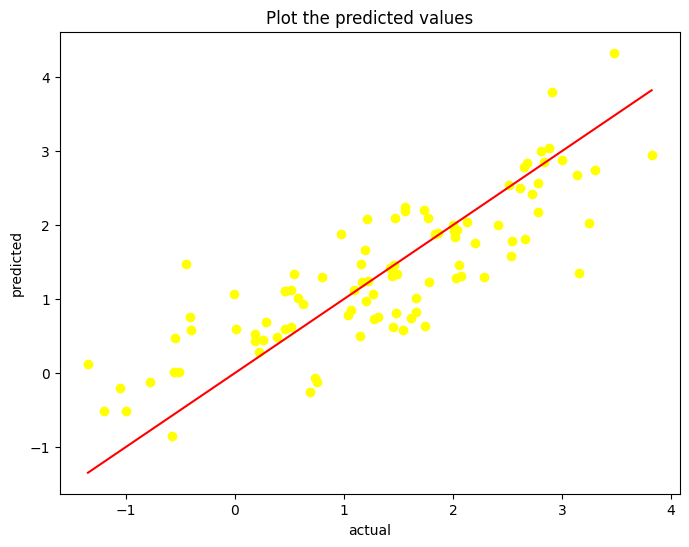

In [215]:
plt.figure(figsize=(8,6))
plt.scatter(y,predictedValues,color='yellow')
plt.plot([min(y),max(y)],[min(y),max(y)],color='red')
plt.xlabel('actual')
plt.ylabel('predicted')
plt.title('Plot the predicted values')
plt.show()

**(h)** Plot the histogram of residuals as well as their qq-plot using `statsmodels` function `qqplot`. Can we admit that the residuals are normally distributed? Compute the residual sum of squares (RSS).

Text(0.5, 1.0, 'qq-plot of residuals')

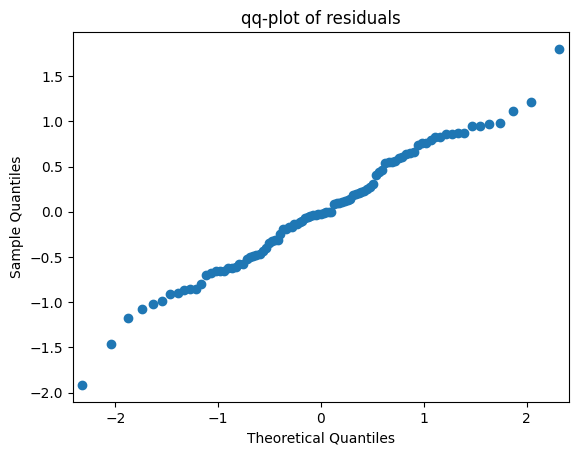

In [217]:
statsmodels.api.qqplot(results.resid)
plt.title("qq-plot of residuals")

can we? idk if this can be perceived like a line but based on the jarques bera test we should say yes ;pvalue=0.127

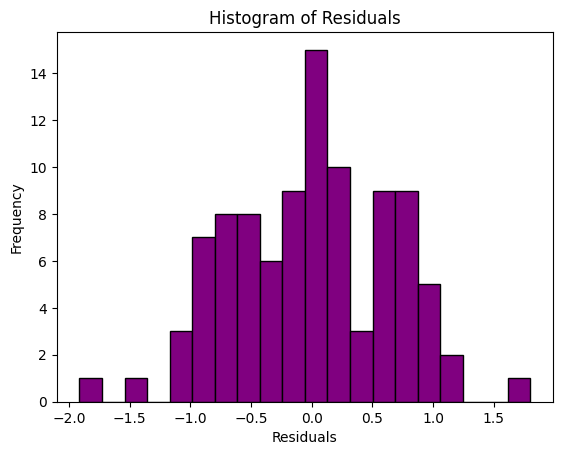

In [224]:
plt.hist(results.resid,color='purple',edgecolor='black', bins=20)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

**(i)** What happens if predictors `lpsa` and `lcp` are removed from the multiple linear regression model? Note that you can pass a list of strings to `df.columns.drop` method.

In [253]:
XNew=X.drop(columns=['lpsa','lcp'])
X1.head()

,lweight,age,lbph,pgg45,svi_1,gleason_7,gleason_8,gleason_9,intercept
0,2.769459,50,-1.386294,0,0.0,0.0,0.0,0.0,1
1,3.319626,58,-1.386294,0,0.0,0.0,0.0,0.0,1
2,2.691243,74,-1.386294,20,0.0,1.0,0.0,0.0,1
3,3.282789,58,-1.386294,0,0.0,0.0,0.0,0.0,1
4,3.432373,62,-1.386294,0,0.0,0.0,0.0,0.0,1


In [254]:
#Build and Fit the model
model = sm.OLS(y, XNew)
resultsNew=model.fit()
resultsNew.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 lcavol   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                     8.390
Date:                Sat, 15 Feb 2025   Prob (F-statistic):           2.11e-08
Time:                        19:06:20   Log-Likelihood:                -125.58
No. Observations:                  97   AIC:                             269.2
Df Residuals:                      88   BIC:                             292.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
lweight        0.5850      0.259      2.257      0.026       0.070       1.100
age            0.0073      0.015      0.497      0.621      -0.022       0.036
lbph          -0.0746      0.077     -0.967      0.336      -0.228       0.079
pgg45         -0.0004      0.006     -0.076      0.939      -0.012       0.011
svi_1          1.0246      0.271      3.774      0.000       0.485       1.564
gleason_7      0.8007      0.274      2.918      0.004       0.255       1.346
gleason_8      0.6869      0.960      0.715      0.476      -1.221       2.595
gleason_9      1.1726      0.644      1.820      0.072      -0.108       2.453
intercept     -1.9717      1.159     -1.701      0.092      -4.275       0.332
==============================================================================
Omnibus:                        0.297   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.862   Jarque-Bera (JB):                0.473
Skew:                          -0.013   Prob(JB):                        0.789
Kurtosis:                       2.659   Cond. No.                         882.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [255]:
predictionsNew=resultsNew.get_prediction(XNew)
predictedValuesNew=predictionsNew.predicted_mean

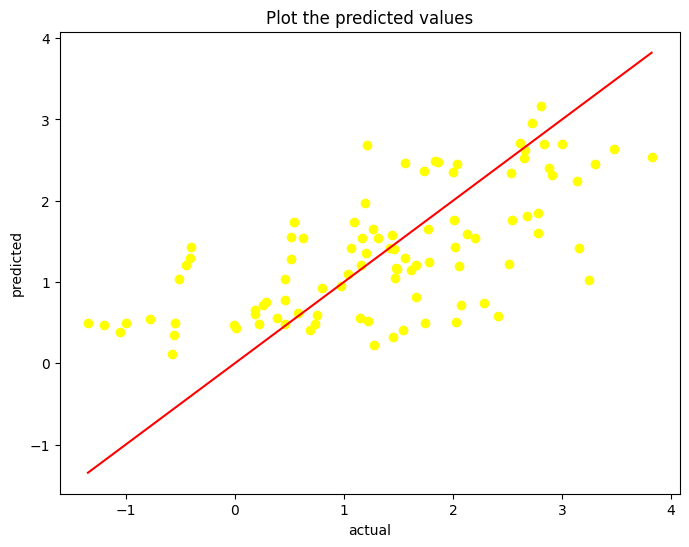

In [256]:
plt.figure(figsize=(8,6))
plt.scatter(y,predictedValuesNew,color='yellow')
plt.plot([min(y),max(y)],[min(y),max(y)],color='red')
plt.xlabel('actual')
plt.ylabel('predicted')
plt.title('Plot the predicted values')
plt.show()

Text(0.5, 1.0, 'qq-plot of residuals')

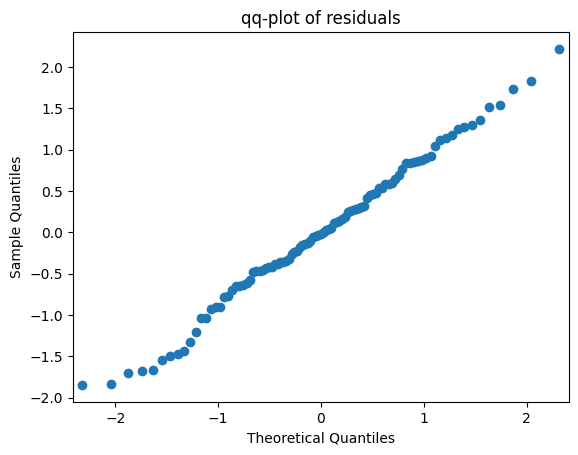

In [257]:
statsmodels.api.qqplot(resultsNew.resid)
plt.title("qq-plot of residuals")

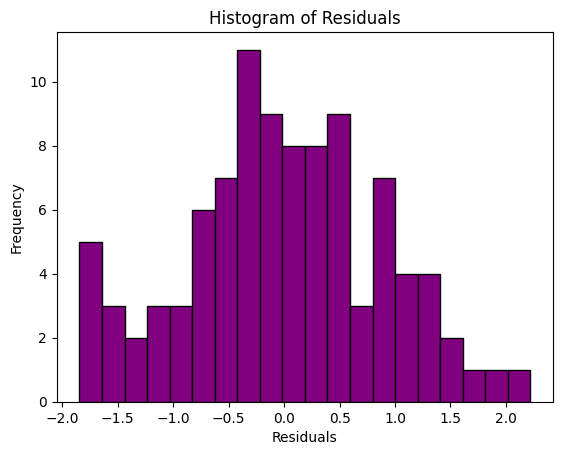

In [258]:
plt.hist(resultsNew.resid,color='purple',edgecolor='black', bins=20)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

The model is still globally significant tho with those variables included the model had a better coefficient of determination , some variables became statistically significant such as 'lweight', 'svi_1' and 'gleason_7', the others are not. Also, the residuals are normally distributed.

## ▶️ Exercise 3: Best subset selection (5 points)

A regression model that uses $k$ predictors is said to be of size $k$. For instance, 

$$
\texttt{lcavol} = \beta_1 \texttt{lpsa} + \beta_0 + \varepsilon \quad \text{and} \quad \texttt{lcavol} = \beta_1 \texttt{lweight} + \beta_0 + \varepsilon
$$

are models of size one. The regression model without any predictor $\texttt{lcavol} = \beta_0 + \varepsilon$ is a model of size 0.

The goal of this exercise is to select the best model of size $k$ for each $k \in \{0, \dots, 8\}$.

**(a)** Compute the residual sums of squares (RSS) for all models of size $k = 2$. Which model has the smallest RSS? Note that you can use a generator [`itertools.combination`](https://docs.python.org/3/library/itertools.html#itertools.combinations) to automatize for you all the combinations of $k$ elements among $n$.

**(b)** For each value of $k \in \{0, \dots, 8\}$, select the set of predictors that minimizes the RSS. Plot these values as a function of $k$. Provide the names of the selected predictors for each value of $k$.

**(c)** Do you think that minimizing the residual sum of squares is well suited to select the optimal size for the regression models? Justify your answer using what you've learned in class.

In [348]:
#Let's start with k=2! 
#How many variables do we have ?
df_enc.columns

Index(['lcavol', 'lweight', 'age', 'lbph', 'lcp', 'pgg45', 'lpsa', 'svi_1',
       'gleason_7', 'gleason_8', 'gleason_9', 'intercept'],
      dtype='object')

In [349]:
#remove the intercept
data=df_enc.drop(columns=['intercept','lcavol'])
data.head()
#10 variables -> 45
# idk why they saying from 0 to 8 when we actually have 10 variables!!

,lweight,age,lbph,lcp,pgg45,lpsa,svi_1,gleason_7,gleason_8,gleason_9
0,2.769459,50,-1.386294,-1.386294,0,-0.430783,0.0,0.0,0.0,0.0
1,3.319626,58,-1.386294,-1.386294,0,-0.162519,0.0,0.0,0.0,0.0
2,2.691243,74,-1.386294,-1.386294,20,-0.162519,0.0,1.0,0.0,0.0
3,3.282789,58,-1.386294,-1.386294,0,-0.162519,0.0,0.0,0.0,0.0
4,3.432373,62,-1.386294,-1.386294,0,0.371564,0.0,0.0,0.0,0.0


In [350]:
#RSS computed for combos of k variables 
def RSSComputation(data,k):
    rss={}
    p=data.shape[1]
    for combination in itertools.combinations(range(p), k):
        #Our combo
        data_c = data.iloc[:, list(combination)].copy() #since it caused some warnings without .copy()
        #Add intercept!
        data_c.loc[:, 'intercept'] = 1
        #Fit the model
        model = sm.OLS(y, data_c)
        results = model.fit()
        #Calculate the RSS
        residuals = results.resid
        rss[combination] = np.sum(residuals**2)
    return rss

In [351]:
#RSS for k=2
rss= RSSComputation(data,2)
rss

{(0, 1): np.float64(120.40250122702454),
 (0, 2): np.float64(121.31398244672992),
 (0, 3): np.float64(68.60764878652884),
 (0, 4): np.float64(100.89502527465433),
 (0, 5): np.float64(61.18712133443477),
 (0, 6): np.float64(89.34527015479905),
 (0, 7): np.float64(103.29608594862304),
 (0, 8): np.float64(122.86204836043456),
 (0, 9): np.float64(119.12874177423939),
 (1, 2): np.float64(126.20550788457382),
 (1, 3): np.float64(69.93020614440238),
 (1, 4): np.float64(106.68068565767825),
 (1, 5): np.float64(60.03569673480601),
 (1, 6): np.float64(91.1061939836275),
 (1, 7): np.float64(107.20656995813148),
 (1, 8): np.float64(126.54241256294002),
 (1, 9): np.float64(124.29021227554136),
 (2, 3): np.float64(72.40419329881722),
 (2, 4): np.float64(108.27431962102187),
 (2, 5): np.float64(59.90978928206386),
 (2, 6): np.float64(93.90983320517356),
 (2, 7): np.float64(109.91324974072754),
 (2, 8): np.float64(133.2513999697915),
 (2, 9): np.float64(130.0730194203554),
 (3, 4): np.float64(72.52999

In [327]:
#Best one for k=2?
best_model = min(rss, key=rss.get)
best_rss = rss[best_model]

print(f"Index for best model: {best_model}")
print(f"Smallest RSS: {best_rss}")

Index for best model: (3, 5)
Smallest RSS: 47.27809728978648


In [357]:
#for any k 
def BestModel(data):
    for i in range(1,data.shape[1]+1):
            rss= RSSComputation(data,i)
            best_model = min(rss, key=rss.get)
            best_rss = rss[best_model]
            print(f"Index for best model: {best_model}")
            print(f"Smallest RSS: {best_rss}")

In [358]:
BestModel(data)

Index for best model: (5,)
Smallest RSS: 61.42090741678992
Index for best model: (3, 5)
Smallest RSS: 47.27809728978648
Index for best model: (1, 3, 5)
Smallest RSS: 46.237825150928
Index for best model: (1, 2, 3, 5)
Smallest RSS: 44.87840603234042
Index for best model: (1, 2, 3, 4, 5)
Smallest RSS: 44.311332487318964
Index for best model: (1, 2, 3, 4, 5, 8)
Smallest RSS: 43.77602097098613
Index for best model: (1, 2, 3, 4, 5, 7, 9)
Smallest RSS: 42.47364094908342
Index for best model: (1, 2, 3, 4, 5, 7, 8, 9)
Smallest RSS: 42.17393288847961
Index for best model: (1, 2, 3, 4, 5, 6, 7, 8, 9)
Smallest RSS: 41.81544394741466
Index for best model: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)
Smallest RSS: 41.81406860804535


## ▶️ Exercise 4: Split-validation (5 points)

You have now found the best model for each of the nine possible model sizes. In the following, we wish to compare these nine diﬀerent regression models.

**(a)** Give a brief overview of split-validation: how it works? Why it is not subject to the same issues raised in
the item (c) of the previous Exercise?

**(b)** Use function `train_test_split` from the `sklearn` package to split the dataset into a training and a validation (or test) partition. You can set `test_size=0.3`. For each of the nine models from before (i.e. those that minimized the RSS for each size $k$), compute the mean prediction error calculated over the samples from the test set and compare it to its corresponding mean training error. Plot a curve for each of these error as a function of size $k$. 

**(c)** Based on the previous results, choose the best model for this dataset, giving the parameter estimates for the model trained on the whole dataset (i.e. without splitting), and explain your choice.

**(d)** What is the main limitation of split-validation ? Illustrate this issue on the cancer dataset. What could
you do to address this problem? Code such alternative method and comment the result. Note that `sklearn` can provide you with many choices. See [here](https://scikit-learn.org/stable/model_selection.html) for more information.

split validation is when we split data before using it so we train the model on a part of the dataset and test with what's left, as testing on the train dataset won't bring us no extraordinary info on the performance of the model, it might have an "overfitting" issue thus give us great results.  

In [369]:
def models(data):
    r=[]
    for i in range(1,data.shape[1]+1):
            rss= RSSComputation(data,i)
            best_model = min(rss, key=rss.get)
            r.append(best_model)
    return r

In [370]:
models(data)

[(5,),
 (3, 5),
 (1, 3, 5),
 (1, 2, 3, 5),
 (1, 2, 3, 4, 5),
 (1, 2, 3, 4, 5, 8),
 (1, 2, 3, 4, 5, 7, 9),
 (1, 2, 3, 4, 5, 7, 8, 9),
 (1, 2, 3, 4, 5, 6, 7, 8, 9),
 (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)]

In [383]:
#Mean prediction error for models who min the RSS for k variables 
def MeanPredictionError(data):
    train_error=[]
    test_error=[]
    for model in models(data):
        #Our combo
        data_c = data.iloc[:, list(model)].copy() #since it caused some warnings without .copy()
        #Add intercept!
        data_c.loc[:, 'intercept'] = 1
        X_train,X_test,y_train,y_test=sklearn.model_selection.train_test_split(data_c,y,test_size=0.3)
        #Fit the model
        model = sm.OLS(y_train, X_train)
        results = model.fit()
        # Predictions
        y_train_pred = results.predict(X_train)
        y_test_pred = results.predict(X_test)
        train_error.append(sklearn.metrics.mean_squared_error(y_train, y_train_pred))
        test_error.append(sklearn.metrics.mean_squared_error(y_test, y_test_pred))
    return pd.DataFrame({"train error": train_error , "test error": test_error})

In [388]:
error=MeanPredictionError(data)
error

,train error,test error
0,0.674095,0.544008
1,0.523789,0.407632
2,0.459814,0.609703
3,0.432797,0.547754
4,0.449922,0.510587
5,0.392159,0.652388
6,0.399415,0.617791
7,0.434685,0.531592
8,0.395873,0.556767
9,0.368113,0.660485


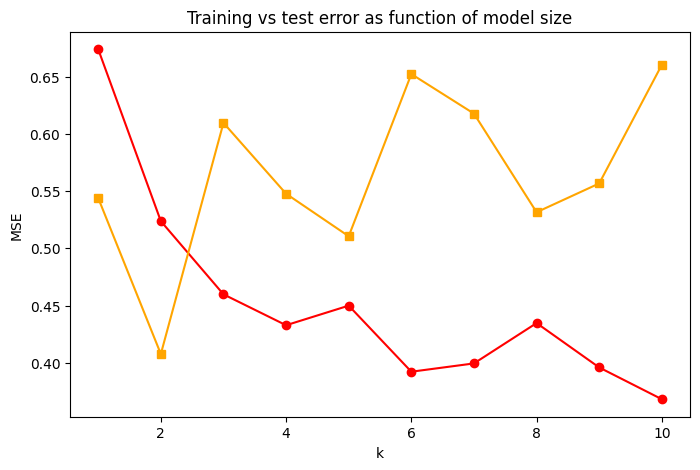

In [395]:
sizes = range(1, X.shape[1])
plt.figure(figsize=(8, 5))
plt.plot(sizes,error["train error"],marker='o',color='red',label='Training Error')
plt.plot(sizes,error["test error"], marker='s',label='Test Error',color='orange')
plt.xlabel('k')
plt.ylabel('MSE')
plt.title('Training vs test error as function of model size')
plt.show()

## ▶️ Exercise 5: Conclusion (2 points)

What is your conclusion about the choice of the best model to predict `lcavol` ? Comment your results.